# Code for SIR with Vaccination and 2 Variants

In [5]:
#Library imports

import PyDSTool as dst
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Below cell sets up the Generator object that represents our system of ODEs.

The system is as follows:

\begin{equation}
\frac{dS}{dt} =
-\beta_1 S \frac{I_1}{N} - \beta_2 S \frac{I_2}{N}  -\rho 
\end{equation}

\begin{equation}
\frac{dI_1}{dt} =
\beta_1 S \frac{I_1}{N} 
-\alpha I_1
\end{equation}

\begin{equation}
\frac{dI_2}{dt} =
\beta_2 S \frac{I_2}{N} +
\beta_2 V \frac{I_2}{N} 
-\alpha I_2
\end{equation}

\begin{equation}
\frac{dR}{dt} =
\alpha \left( I_1 + I_2 \right)
\end{equation}

\begin{equation}
\frac{dV}{dt} =
\rho - \beta_2 V \frac{I_2}{N}
\end{equation}

$\beta_1$ = Strain 1 Infection rate ,
$\beta_2$ = Strain 2 Infection rate ,
$\alpha$ = Recovery rate,
$\rho$ = Vaccination rate

In [3]:
# setting up initial conditions, parameters and variables
icdict = {'s': 1, 'i1': 1, 'i2':1, 'r':0, 'v': 0}
pardict = {'beta1': 0.1, 'beta2': 0.2, 'alpha': 0.2, 'N': 5000000, 'rho': 100}

# defining RHS of differential equations of the system
ds_rhs = '- (beta1 * s * (i1/N)) - (beta2 * s * (i2/N)) - rho'
di1_rhs = '(beta1 * s * (i1/N)) - (alpha * i1)'
di2_rhs = '(beta2 * s * (i2/N)) + (beta2 * v * (i2/N)) - (alpha * i2)'
dr_rhs = 'alpha * (i1 +i2)'
dv_rhs = 'rho - (beta2 * v * (i2/N))'

vardict = {'s': ds_rhs, 'i1': di1_rhs, 'i2': di2_rhs, 'r': dr_rhs, 'v': dv_rhs} # tells DSTool that there are 5 dynamic state var's, specified by the eqns in the strings dS/dI/dR_rhs

DSargs = dst.args()
DSargs.name = 'SIRV' # name the model
DSargs.ics = icdict # set initial condn's
DSargs.pars = pardict # set parameters
DSargs.tdata = [0, 20] # how long we expect to integrate for
DSargs.varspecs = vardict

#Generator
SIRV = dst.Generator.Vode_ODEsystem(DSargs)

Set some sample values for the paramaters, compute trajectories of each compartment and plot it

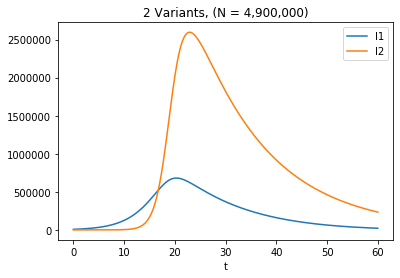

In [4]:
# adjusting parameters and initial conditions, can be done independently without solving ODE's again using generator
SIRV.set(pars={'alpha': 1/14, 'beta1': 0.37, 'beta2': 0.9, 'N': 4900000, 'rho': 50000},
        ics={'i1': 7906, 'i2': 1, 's': 4900000, 'r': 0, 'v': 0},
        tdata=[0,60])

# computing points for plotting 
traj_SIRV = SIRV.compute('test')
pts_SIRV = traj_SIRV.sample()

# creating plot
plt.plot(pts_SIRV['t'], pts_SIRV['i1'], label='I1')
#plt.plot(pts_SIRV['t'], pts_SIRV['s'], label='S')
#plt.plot(pts_SIRV['t'], pts_SIRV['r'], label='R')
#plt.plot(pts_SIRV['t'], pts_SIRV['v'], label='V')
plt.plot(pts_SIRV['t'], pts_SIRV['i2'], label='I2')
plt.legend()
plt.xlabel('t')
plt.title('2 Variants, (N = 4,900,000)')
plt.show()

#### Creating multiple plots at once

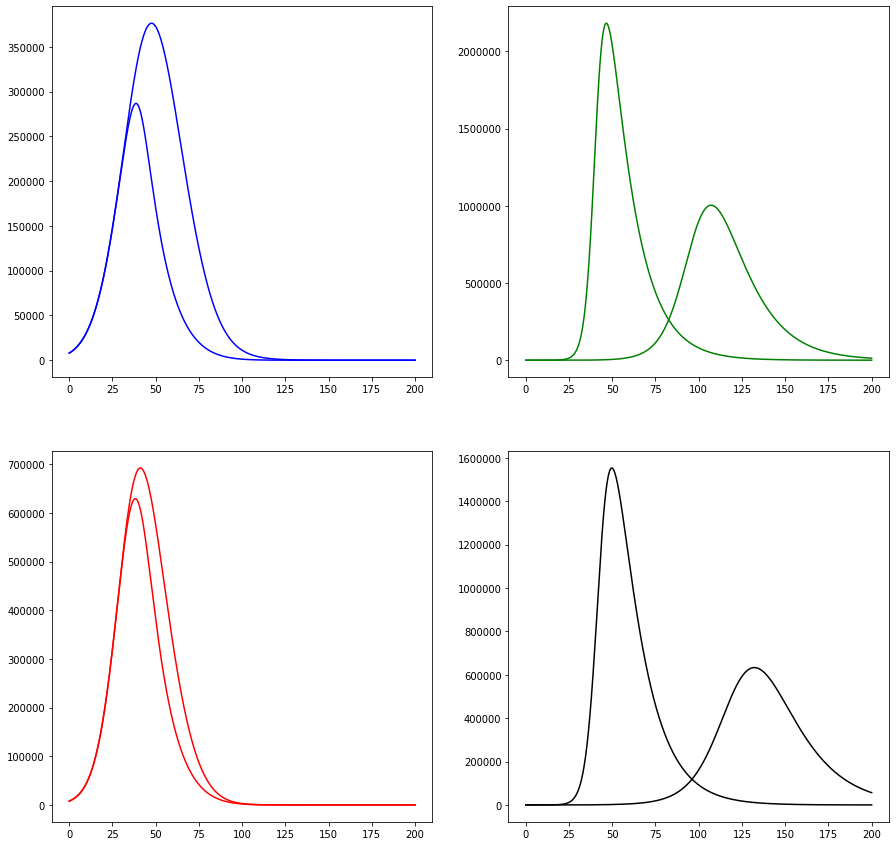

In [60]:
fig, axs = plt.subplots(2, 2, figsize = (15,15))

colorset1 = ['b', 'r']
colorset2 = ['g', 'k']
num1 = 0
num2 = 0
row_index= 0
for param1 in [0.22, 0.26]:
    color1 = colorset1[num1]
    color2 = colorset2[num2]
    for param2 in [0.26, 0.46]:
        SIRV.set( pars = { 'beta1': param1, 'beta2': param2 }, tdata = [0,200] )
        tmp = SIRV.compute('test').sample()  
        axs[row_index, 0].plot(tmp['t'], tmp['i1'], color=color1)
        axs[row_index, 1].plot(tmp['t'], tmp['i2'], color=color2)
    num1 += 1
    num2 += 1
    row_index += 1
plt.show()

#### Creating a series of plots

Plots of I1 and I2 for $\beta_1 = 0.15$ (reflecting current lockdown measures) and various values of $\beta_2$

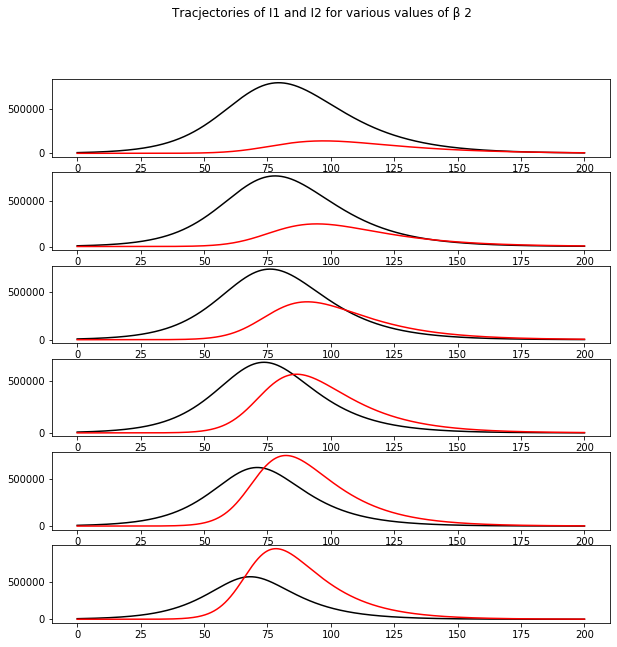

In [11]:
fig, axs = plt.subplots(6, figsize = (10,10))
fig.suptitle('Tracjectories of I1 and I2 for various values of \u03B2 2')
row_index = 0
for param in [0.25, 0.26, 0.27, 0.28, 0.29, 0.3]:
    SIRV.set( pars = { 'beta1': 0.15, 'beta2': param, 'rho': 0 }, tdata = [0,200] )
    tmp = SIRV.compute('test').sample()  
    axs[row_index].plot(tmp['t'], tmp['i1'], color='k')
    axs[row_index].plot(tmp['t'], tmp['i2'], color='r')
    row_index += 1
plt.show()

#### Adding Imported Cases to the Equation

Equations for infected will be modified to account for people entering the county at some rate $\delta$ a fraction of which will be infected, denote this proprtion as $p$

Our system of equations becomes:

\begin{equation}
\frac{dS}{dt} =
-\beta_1 S \frac{I_1}{N} - \beta_2 S \frac{I_2}{N}  -\rho + \delta (1 - p)
\end{equation}

\begin{equation}
\frac{dI_1}{dt} =
\beta_1 S \frac{I_1}{N} 
-\alpha I_1
\end{equation}

\begin{equation}
\frac{dI_2}{dt} =
\beta_2 S \frac{I_2}{N} +
\beta_2 V \frac{I_2}{N} 
-\alpha I_2
+\delta p
\end{equation}

\begin{equation}
\frac{dR}{dt} =
\alpha \left( I_1 + I_2 \right)
\end{equation}

\begin{equation}
\frac{dV}{dt} =
\rho - \beta_2 V \frac{I_2}{N}
\end{equation}


- $\beta_1$ = Variant 1 Infection rate ,
- $\beta_2$ = Variant 2 Infection rate ,
- $\alpha$ = Recovery rate,
- $\rho$ = Vaccination rate
- $p$ = proportion of imports that are infectious (for now assume the have the 2nd variant)
- $\delta$ = Import rate
